In [1]:
import pandas as pd
import yfinance as yf
import numpy as np
import datetime as dt
from pandas.tseries.offsets import MonthEnd

In [2]:
tickers = ['amzn', 'aapl', 'msft', 'goog', 'pypl', 'adbe', 'tsla']
df = yf.download(tickers, start='2015-8-23')

prices = df['Adj Close']
prices.index = pd.to_datetime(prices.index)

[*********************100%***********************]  7 of 7 completed


In [3]:
prices

,AAPL,ADBE,AMZN,GOOG,MSFT,PYPL,TSLA
Date,,,,,,,
2015-08-24,23.500525,74.269997,23.168501,29.480499,37.222424,33.750000,14.591333
2015-08-25,23.641813,74.570000,23.318501,29.103001,36.141846,32.700001,14.668667
2015-08-26,24.997795,77.330002,25.038500,31.431000,38.142273,33.169998,14.989333
2015-08-27,25.733889,78.910004,25.918501,31.880501,39.205006,34.619999,16.199333
2015-08-28,25.818218,79.400002,25.900499,31.518999,39.231800,35.040001,16.565332
...,...,...,...,...,...,...,...
2022-11-10,146.869995,329.950012,96.629997,94.169998,242.979996,86.800003,190.720001
2022-11-11,149.699997,341.149994,100.790001,96.730003,247.110001,91.029999,195.970001
2022-11-14,148.279999,340.369995,98.489998,96.029999,241.550003,89.510002,190.949997


In [4]:
buydates = pd.date_range(prices.index[0], prices.index[-1], freq='1M')

In [5]:
buyprices = df[df.index.isin(buydates)].Close

In [6]:
btc_amt = 500/buyprices

In [7]:
500*len(buyprices)

5500

In [8]:
btc_amt_LS = 500 * len(buyprices) / buyprices[0]

In [9]:
btc_amt_LS

1.493496712822221

In [10]:
btc_amt_sum = btc_amt.cumsum()

In [11]:
btc_amt_sum.name = 'btc_amt_DCA'

In [12]:
df_tog = pd.concat([btc_amt_sum,df], axis=1).ffill()

In [13]:
df_tog['btc_amt_LS'] = btc_amt_LS

In [14]:
df_tog

,btc_amt_DCA,Open,High,Low,Close,Adj Close,Volume,btc_amt_LS
Date,,,,,,,,
2021-12-31,0.135772,3713.430176,3807.288818,3636.869873,3682.632812,3682.632812,14157285268,1.493497
2022-01-01,0.135772,3683.047119,3769.917969,3682.286621,3769.697021,3769.697021,9776191466,1.493497
2022-01-02,0.135772,3769.298340,3836.161865,3727.357422,3829.564941,3829.564941,9881471548,1.493497
2022-01-03,0.135772,3829.535645,3836.198730,3698.047607,3761.380371,3761.380371,12080777893,1.493497
2022-01-04,0.135772,3761.361572,3876.785156,3723.349854,3794.056641,3794.056641,14030925983,1.493497
...,...,...,...,...,...,...,...,...
2022-11-07,2.868040,1572.016968,1604.475342,1550.415527,1568.591309,1568.591309,15279963349,1.493497
2022-11-08,2.868040,1568.329590,1574.799805,1259.443115,1332.835571,1332.835571,42048003440,1.493497
2022-11-09,2.868040,1333.122437,1335.743530,1083.285645,1100.169800,1100.169800,38864492427,1.493497


Date
2021-12-31     500.000000
2022-01-01     511.820919
2022-01-02     519.949332
2022-01-03     510.691747
2022-01-04     515.128284
                 ...     
2022-11-07    4498.783165
2022-11-08    3822.626198
2022-11-09    3155.331377
2022-11-10    3726.916905
2022-11-12    3648.623814
Length: 316, dtype: float64

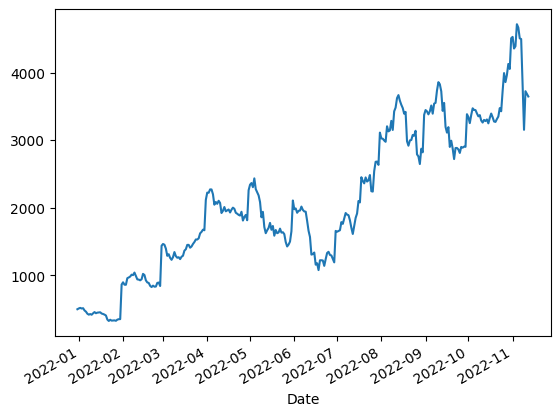

In [15]:
(df_tog.btc_amt_DCA * df_tog.Close).plot()
(df_tog.btc_amt_DCA * df_tog.Close)

Date
2021-12-31    5500.000000
2022-01-01    5630.030110
2022-01-02    5719.442652
2022-01-03    5617.609220
2022-01-04    5666.411121
                 ...     
2022-11-07    2342.685963
2022-11-08    1990.585544
2022-11-09    1643.099980
2022-11-10    1940.746108
2022-11-12    1899.975945
Length: 316, dtype: float64

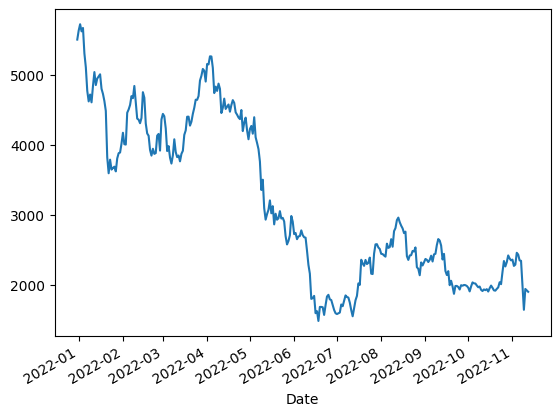

In [16]:
(df_tog.btc_amt_LS * df_tog.Close).plot()
(df_tog.btc_amt_LS * df_tog.Close)